<a href="https://colab.research.google.com/github/minyoy/ML-DL-Basics-study/blob/main/wk3/assignment_wk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3 Assignment**

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**`adult.csv` 파일을 읽어서 `data` 변수에 저장하세요.**

In [ ]:
import pandas as pd

# load data
data = pd.read_csv('/content/drive/MyDrive/wk3/adult.csv')

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**`LabelEncoder`를 활용하여 categorical 변수를 numeric 변수로 바꾸어주세요.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# transform (categorical to numeric)
catergorical_cols = ["workclass", "education", "marital.status", "occupation",
                     "relationship", "race", "sex", "native.country"]
le = LabelEncoder()
for c in catergorical_cols:
  data[c] = le.fit_transform(data[c])

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,<=50K
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,<=50K
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,<=50K
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,<=50K
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,<=50K


**`X`와 `y` 변수를 지정하고, 학습 데이터와 테스트 데이터로 나누세요.**

- `X`는 "income" 변수를 제외한 모든 변수를 사용하세요.
- `y`는 "income" 변수를 사용하세요.
- `random_state` 는 42로 설정하세요.
- x와 y 변수를 8:2 비율로 train과 test로 나누세요.

In [ ]:
from sklearn.model_selection import train_test_split

# X, y split
X = data.drop('income', axis=1)
y = data['income']

# X_train, X_test, y_train, y_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5514,26,4,256263,11,9,4,3,1,4,1,0,0,25,39
19777,24,4,170277,11,9,4,8,1,4,0,0,0,35,39
10781,36,4,75826,9,13,0,1,4,4,0,0,0,40,39
32240,22,7,24395,15,10,2,1,5,4,0,0,0,20,39
9876,31,2,356689,9,13,2,10,0,4,1,0,0,40,39


**`DecisionTreeClassifier`를 사용하여 모델을 학습시키세요.**
- `criterion`을 "gini"로 설정하세요.
- `max_depth`를 5로 설정하세요.
- `random_state`를 42로 설정하세요.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# make decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# fit decision tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

**이전 단계에서 학습시킨 모델의 test accuracy를 구하고 각 변수의 중요도를 그래프로 그려보세요.**

In [ ]:
from sklearn.metrics import accuracy_score

# test decision tree
y_pred = dt.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print(f"test accuracy : {acc}")

test accuracy : 0.8547520343927529


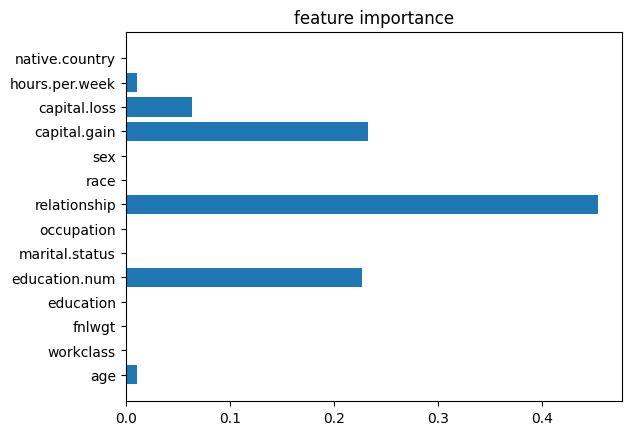

In [ ]:
import matplotlib.pyplot as plt

# plot feature importance
plt.barh(X.columns, dt.feature_importances_)
plt.title("feature importance")
plt.show()

**`RandomForestClassifier`를 사용하여 모델을 학습시키세요.**
- 트리의 개수는 200개로 설정하세요.
- `max_depth`는 10으로 설정하세요.
- `max_features`는 "sqrt"로 설정하세요.
- `random_state`는 42로 설정하세요.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# make random forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, max_features="sqrt", random_state=42)

# fit random forest
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

**이전 단계에서 학습시킨 모델의 accuracy를 구하고 각 변수의 중요도를 그래프로 그려보세요.**

In [ ]:
from sklearn.metrics import accuracy_score

# test random forest
y_pred = rf.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print(f"test accuracy : {acc}")

test accuracy : 0.8610471364962383


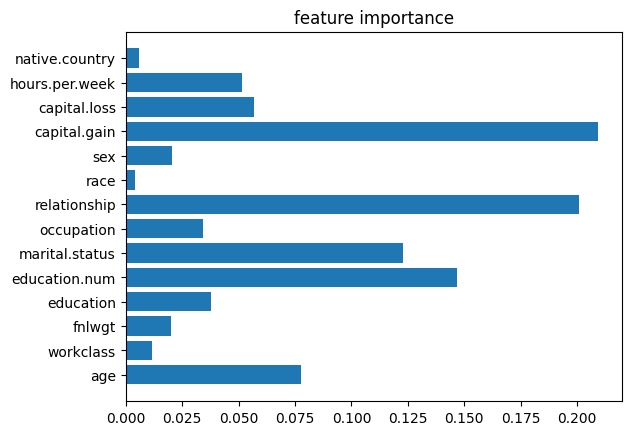

In [ ]:
import matplotlib.pyplot as plt

# plot feature importance
plt.barh(X.columns, rf.feature_importances_)
plt.title("feature importance")
plt.show()

**`StratifiedKFold` 를 이용하여 K-fold cross validation을 진행하세요.**
- 모델은 `RandomForestClassifer`를 이용하세요. (모델의 `random_state`는 42로 설정하세요.)
- K의 값은 3으로 설정해주세요.
- `shuffle`은 True로 설정하세요
- `random_state`는 42로 설정하세요.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = []

for i, (train_index, val_index) in enumerate(fold.split(X_train, y_train)):
    # train, validation split
    X_, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # make random foresr
    rf = RandomForestClassifier(random_state=42)
    # fit random forest
    rf.fit(X_, y_)
    # validation
    y_pred = rf.predict(X_val)
    acc = accuracy_score(y_pred, y_val)

    scores.append(acc)
    print(f"fold {i+1} accuracy: {acc}")

print(f"validation accuracy (mean): {np.mean(scores)}")

fold 1 accuracy: 0.8570770471035356
fold 2 accuracy: 0.8559253714154095
fold 3 accuracy: 0.8519926284266298
validation accuracy (mean): 0.8549983489818583
